In [26]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

In [3]:
models = ["VGG-Face","Facenet","Facenet512","OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace"]

metrics = ["cosine", "euclidean", "euclidean_l2"]

backends = ['opencv','ssd','dlib','mtcnn','retinaface','mediapipe']

In [5]:
img = cv2.imread("face_recognition_images/Nikhil.jpg")
cv2.imshow("img",img)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

In [19]:
def face_capture():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite('face_recognition_images/face.jpg', frame)

    cap.release()
    cv2.destroyAllWindows()

In [73]:
face_capture()
img1 = cv2.imread("face_recognition_images/Nikhil.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("face_recognition_images/face.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [74]:
auth = DeepFace.verify(img1_path=img1, img2_path=img2, model_name=models[2], enforce_detection=False)
if auth['verified']:
    print("Eres tú")
else:
    print("Fuera fuera fuera fuera")

1/1 [==============================] - 0s 81ms/step
Fuera fuera fuera fuera


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 0s 295ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:01,  2.34it/s]

1/1 [==============================] - 0s 256ms/step


Action: race:  50%|█████     | 2/4 [00:00<00:00,  2.84it/s]  

1/1 [==============================] - 0s 251ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:01<00:00,  3.04it/s]

1/1 [==============================] - 0s 27ms/step


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]


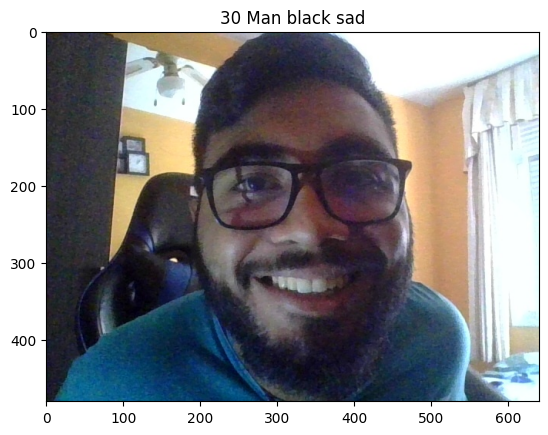

30 Man black sad


In [75]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img3 = cv2.imread("face_recognition_images/Nikhil.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
obj = DeepFace.analyze(img_path = img2, actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)
edad = obj['age']
genero = obj['gender']
raza = obj['dominant_race']
emocion = obj['dominant_emotion']

plt.figure()
plt.imshow(img2)
plt.title(str(edad)+" " + genero + " " + raza + " " + emocion)
plt.show()
print(edad,genero,raza,emocion)